In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Check if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Define data transformations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

valid_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets!cp "./drive/My Drive/Colab Notebooks/Untitled.ipynb" ./
train_dataset = torchvision.datasets.ImageFolder("/content/drive/MyDrive/Image Dataset/ImageDataset/train", transform=train_transform)
valid_dataset = torchvision.datasets.ImageFolder("/content/drive/MyDrive/Image Dataset/ImageDataset/valid", transform=valid_transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Initialize ResNet18 model
model = models.resnet18(weights=None)
model = model.to(device)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)

In [ ]:
for inputs, labels in train_loader:
  print(labels)

Epoch [1/15], Train Accuracy: 69.02%, Train Loss: 0.9552, Valid Accuracy: 85.95%, Valid Loss: 0.4015
Epoch [2/15], Train Accuracy: 80.06%, Train Loss: 0.5606, Valid Accuracy: 84.30%, Valid Loss: 0.4145
Epoch [3/15], Train Accuracy: 84.91%, Train Loss: 0.4269, Valid Accuracy: 86.93%, Valid Loss: 0.3595
Epoch [4/15], Train Accuracy: 87.40%, Train Loss: 0.3583, Valid Accuracy: 88.66%, Valid Loss: 0.3386
Epoch [5/15], Train Accuracy: 88.88%, Train Loss: 0.3158, Valid Accuracy: 94.52%, Valid Loss: 0.1726
Epoch [6/15], Train Accuracy: 90.21%, Train Loss: 0.2779, Valid Accuracy: 92.11%, Valid Loss: 0.2445
Epoch [7/15], Train Accuracy: 90.72%, Train Loss: 0.2657, Valid Accuracy: 93.69%, Valid Loss: 0.1689
Epoch [8/15], Train Accuracy: 92.00%, Train Loss: 0.2295, Valid Accuracy: 95.04%, Valid Loss: 0.1406
Epoch [9/15], Train Accuracy: 92.07%, Train Loss: 0.2217, Valid Accuracy: 94.44%, Valid Loss: 0.1396
Epoch [10/15], Train Accuracy: 92.63%, Train Loss: 0.2056, Valid Accuracy: 95.34%, Valid Lo

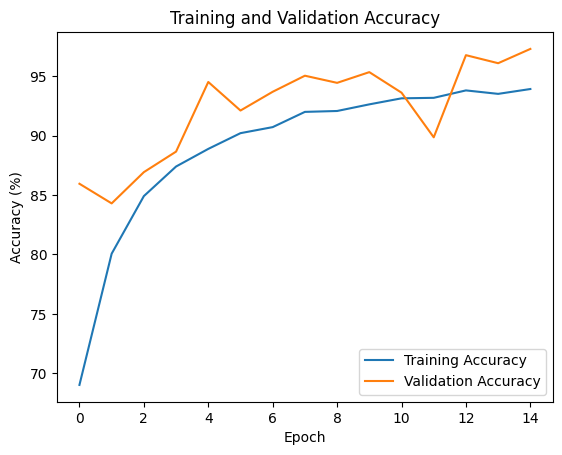

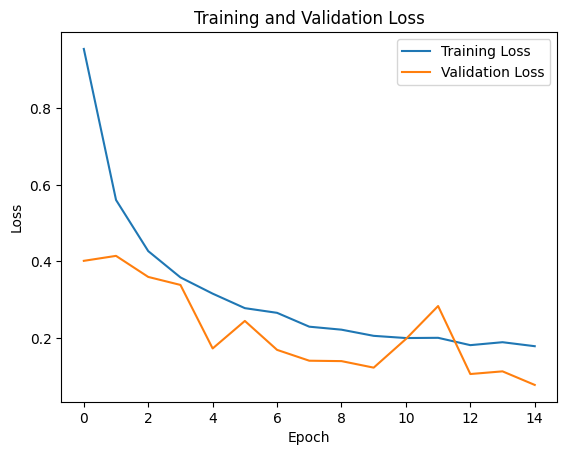

In [6]:
# Lists to store metrics
train_accuracy_history = []
valid_accuracy_history = []
train_loss_history = []
valid_loss_history = []

# Train the model
num_epochs = 15
for epoch in range(num_epochs):
    # Training loop
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    true_labels_train = []
    predicted_labels_train = []
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        true_labels_train.extend(labels.cpu().numpy())
        predicted_labels_train.extend(predicted.cpu().numpy())
        running_loss += loss.item() * inputs.size(0)

    epoch_train_accuracy = 100 * correct / total
    epoch_train_loss = running_loss / len(train_dataset)
    train_accuracy_history.append(epoch_train_accuracy)
    train_loss_history.append(epoch_train_loss)

    # Validation loop
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    true_labels_valid = []
    predicted_labels_valid = []
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        true_labels_valid.extend(labels.cpu().numpy())
        predicted_labels_valid.extend(predicted.cpu().numpy())
        running_loss += loss.item() * inputs.size(0)

    epoch_valid_accuracy = 100 * correct / total
    epoch_valid_loss = running_loss / len(valid_dataset)
    valid_accuracy_history.append(epoch_valid_accuracy)
    valid_loss_history.append(epoch_valid_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Accuracy: {epoch_train_accuracy:.2f}%, Train Loss: {epoch_train_loss:.4f}, Valid Accuracy: {epoch_valid_accuracy:.2f}%, Valid Loss: {epoch_valid_loss:.4f}')

# Generate classification report for training data
train_classification_report = classification_report(true_labels_train, predicted_labels_train)

# Generate classification report for validation data
valid_classification_report = classification_report(true_labels_valid, predicted_labels_valid)

# Print classification reports
print("Training Classification Report:")
print(train_classification_report)
print("Validation Classification Report:")
print(valid_classification_report)

# Plot training and validation accuracy
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(valid_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(train_loss_history, label='Training Loss')
plt.plot(valid_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [8]:
torch.save(model.state_dict(), '/content/drive/My Drive/resnet18_model.pth')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Confusion Matrix:
[[219   0   0   2   0   0]
 [  0  30   0   0   0   0]
 [  0   0 212   5   0   4]
 [  4   0   0 209   0   8]
 [  0   0   0   0 220   0]
 [  0   0   5   4   4 405]]

Accuracy: 97.29526671675433


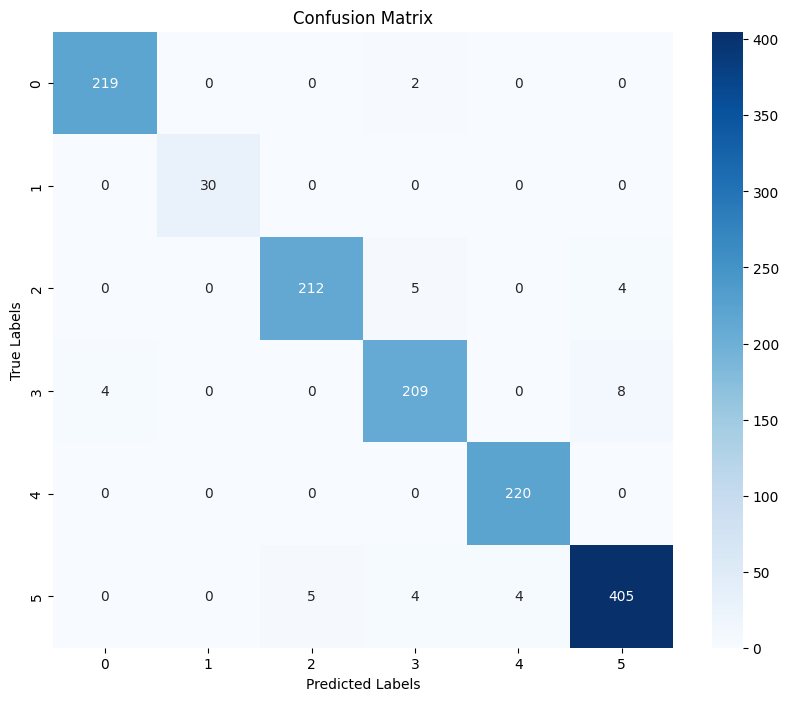

In [17]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define the transformation for the test data (ensure it matches the transformation used during training)
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the path to the test folder
test_folder = '/content/drive/My Drive/Image Dataset/test_data/test'

# Define a dictionary mapping class labels to numerical labels
class_mapping = {
    'potato_early': 0,
    'potato_healthy': 1,
    'potato_late': 2,
    'tomato_early': 3,
    'tomato_healthy': 4,
    'tomato_late': 5
}

# Load the saved model
model = models.resnet18(pretrained=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/resnet18_model.pth', map_location=torch.device('cpu')))
model.eval()

# List to store true labels and predictions
true_labels_test = []
predictions = []

# Iterate over the images in the test folder
for filename in os.listdir(test_folder):
    if filename.endswith('.JPG') or filename.endswith('.png'):  # Adjust file extensions as necessary
        # Open and apply transformation to the image
        img_path = os.path.join(test_folder, filename)
        img = Image.open(img_path).convert('RGB')
        img_tensor = test_transform(img).unsqueeze(0)  # Add batch dimension
        img_tensor = img_tensor.to(device)  # Move tensor to device

        # Make prediction
        with torch.no_grad():
            outputs = model(img_tensor)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

        # Extract class label from file name and append to true labels list
        class_label = '_'.join(filename.split('_')[:2])  # Extract the class label from the file name
        true_labels_test.append(class_mapping[class_label])

# Generate confusion matrix
cm = confusion_matrix(true_labels_test, predictions)
# Calculate accuracy
accuracy = (cm.diagonal().sum() / cm.sum()) * 100

print("Confusion Matrix:")
print(cm)

# Calculate and print accuracy
print("\nAccuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
